In [1]:
#Dependencies
import requests
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from citipy import citipy
# Import API key
from api_keys import weather_api_key

In [13]:
cities = []
while len(cities) < 600:
    lat = round(np.random.uniform(-55.0, 79.0),2)
    lon = round(np.random.uniform(-180.0, 180.0),2)
    city = citipy.nearest_city(lat, lon).city_name
    cities.append(city)
    cities = list(set(cities))

In [15]:
print("Begining of data retrieval\n-----------------")
cities2 = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness =[]
wind = []
country = []
date = []
i = 1

for city in cities:

    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"  
    data = requests.get(url).json()
   
    try:

        lat.append(data["coord"]["lat"])
        lon.append(data["coord"]["lon"])
        maxtemp.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        cloudiness.append(data["clouds"]["all"])
        wind.append(data["wind"]["speed"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
    except: 
        message = data["message"]
        print(f"{message.capitalize()}. Skipping...")     
    else:
        print(f"Processing Record {i} of Set | {city}")
        cities2.append(city)
        cities2 = list(set(cities2))
        i +=1

        
citiesdata = {
    'City': cities2,
    'Lat': lat, 
    'Lng': lon, 
    "Max Temp" : maxtemp, 
    "Humidity" : humidity, 
    "Cloudiness" : cloudiness, 
    "Wind Speed": wind, 
    "Country": country,
    "Date" : date
}


Begining of data retrieval
-----------------
Processing Record 1 of Set | srednekolymsk
Processing Record 2 of Set | dawei
Processing Record 3 of Set | cassilandia
Processing Record 4 of Set | pervouralsk
Processing Record 5 of Set | karratha
Processing Record 6 of Set | mecca
City not found. Skipping...
Processing Record 7 of Set | aksarka
Processing Record 8 of Set | muli
Processing Record 9 of Set | necochea
Processing Record 10 of Set | mar del plata
Processing Record 11 of Set | kirakira
Processing Record 12 of Set | balgazyn
Processing Record 13 of Set | la ronge
Processing Record 14 of Set | kautokeino
Processing Record 15 of Set | merauke
Processing Record 16 of Set | dalvik
Processing Record 17 of Set | bogorodskoye
Processing Record 18 of Set | khromtau
Processing Record 19 of Set | hasaki
Processing Record 20 of Set | bluff
City not found. Skipping...
Processing Record 21 of Set | manggar
Processing Record 22 of Set | hilo
Processing Record 23 of Set | ust-nera
Processing Re

Processing Record 191 of Set | tarbagatay
Processing Record 192 of Set | sao jose da coroa grande
Processing Record 193 of Set | loralai
Processing Record 194 of Set | camacha
Processing Record 195 of Set | kaeo
Processing Record 196 of Set | howard springs
Processing Record 197 of Set | brae
Processing Record 198 of Set | bud
Processing Record 199 of Set | narsaq
Processing Record 200 of Set | upata
Processing Record 201 of Set | katangli
Processing Record 202 of Set | ca mau
Processing Record 203 of Set | port hardy
Processing Record 204 of Set | pisco
Processing Record 205 of Set | nizhnevartovsk
Processing Record 206 of Set | rumoi
Processing Record 207 of Set | saldanha
Processing Record 208 of Set | manitouwadge
Processing Record 209 of Set | ovre ardal
Processing Record 210 of Set | richards bay
Processing Record 211 of Set | guajara
Processing Record 212 of Set | darhan
Processing Record 213 of Set | urucara
City not found. Skipping...
Processing Record 214 of Set | victoria
Pr

Processing Record 379 of Set | jogindarnagar
Processing Record 380 of Set | obosi
Processing Record 381 of Set | lorengau
Processing Record 382 of Set | boende
Processing Record 383 of Set | barao de melgaco
Processing Record 384 of Set | corner brook
Processing Record 385 of Set | pemangkat
Processing Record 386 of Set | port dickson
Processing Record 387 of Set | lovozero
Processing Record 388 of Set | vardo
City not found. Skipping...
Processing Record 389 of Set | constitucion
Processing Record 390 of Set | kantunilkin
Processing Record 391 of Set | kjopsvik
Processing Record 392 of Set | kavaratti
Processing Record 393 of Set | bayana
Processing Record 394 of Set | sorland
Processing Record 395 of Set | southbridge
Processing Record 396 of Set | zyryanka
City not found. Skipping...
Processing Record 397 of Set | ancud
Processing Record 398 of Set | hofn
Processing Record 399 of Set | kloulklubed
Processing Record 400 of Set | saint-pierre
Processing Record 401 of Set | meulaboh
Ci

In [16]:
df1 = pd.DataFrame(citiesdata)
df1.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,srednekolymsk,67.4500,153.6833,261.33,80,5,4.47,RU,1618668762
1,dawei,14.0833,98.2000,297.64,86,49,1.02,MM,1618668486
2,cassilandia,-19.1133,-51.7342,301.63,51,3,2.77,BR,1618668779
3,pervouralsk,56.9053,59.9436,285.15,17,0,5.00,RU,1618668779
4,karratha,-20.7377,116.8463,301.39,63,1,0.72,AU,1618668779


KstestResult(statistic=0.2977036328871893, pvalue=1.4432899320127035e-15)


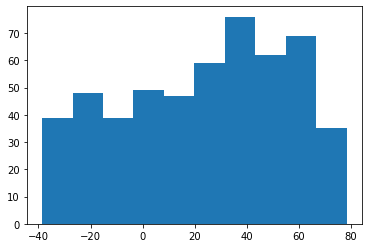

In [25]:
plt.hist(lat)
lat2 = np.random.uniform(-90.0, 90.0, 1000)
#print(stats.kstest(lat, 'uniform', args = (min(lat),max(lat))))
print(stats.kstest(lat, lat2 ,'uniform'))

KstestResult(statistic=0.12304089219330855, pvalue=4.4353379555661654e-05)


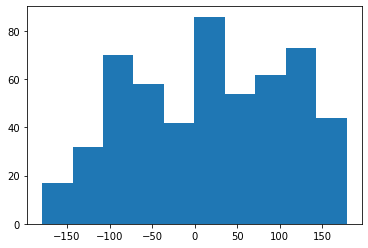

In [26]:

plt.hist(lon)
#print(stats.kstest(lat, 'uniform', args = (min(lat),max(lat))))
lon2 = np.random.uniform(-180.0, 180.0, 1000)
print(stats.kstest(lon, lon2 ,'uniform'))

In [ ]:
-0.4 273    -0.4 185
-54 283     -54  185 

In [29]:
if df1["Humidity"].max() > 100:
    over100 = (df1[df1["Humidity"]>100]).index
    clean_city_data = df1.drop(over100, inplace = False)
    droppedcities = df1.loc[over100]["City"]
    print(", ".join(droppedcities) + " have been removed as humidity was >100%")
else:
    clean_city_data = df1

In [ ]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()


In [ ]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

In [ ]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

In [ ]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [30]:
northerncities = clean_city_data[clean_city_data["Lat"] >= 0]
southerncities = clean_city_data[clean_city_data["Lat"] < 0]

In [31]:
print(len(northerncities), len(southerncities))

381 157


In [ ]:
# Add the linear regression equation and line to plot
northlat = northerncities['Lat']
northtemp = northerncities['Max Temp']
(ntslope, ntintercept, ntrvalue, ntpvalue, ntstderr) = linregress(northlat, northtemp)
northtempregress = northlat * ntslope + ntintercept
ntline = f"y = {ntslope:.2f}x + {ntintercept:.2f}\n$r^{2}$= {ntrvalue:.2f}" 
plt.scatter(northlat,northtemp)
plt.plot(northlat,northtempregress,"r-")
plt.figtext(1,0.2,ntline,fontsize=15,color="red")
plt.title("Max Temperature in Northern Hemisphere Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
southlat = southerncities['Lat']
southtemp = southerncities['Max Temp']
(stslope, stintercept, strvalue, stpvalue, ststderr) = linregress(southlat, southtemp)
southtempregress = southlat * stslope + stintercept
stline = f"y = {stslope:.2f}x + {stintercept:.2f}\n$r^{2}$= {strvalue:.2f}" 
plt.scatter(southlat,southtemp)
plt.plot(southlat,southtempregress,"r-")
plt.figtext(1,0.2,stline,fontsize=15,color="red")
plt.title("Max Temperature in Southern Hemisphere Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
northlat = northerncities['Lat']
northhum = northerncities['Humidity']
(nhslope, nhintercept, nhrvalue, nhpvalue, nhstderr) = linregress(northlat, northhum)
northhumregress = northlat * nhslope + nhintercept
nhline = f"y = {nhslope:.2f}x + {nhintercept:.2f}\n$r^{2}$= {nhrvalue:.2f}" 
plt.scatter(northlat,northhum)
plt.plot(northlat,northhumregress,"r-")
plt.figtext(1,0.2,nhline,fontsize=15,color="red")
plt.title("Humidity in Northern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
southlat = southerncities['Lat']
southhum = southerncities['Humidity']
(shslope, shintercept, shrvalue, shpvalue, shstderr) = linregress(southlat, southhum)
sorthhumregress = southlat * shslope + shintercept
shline = f"y = {shslope:.2f}x + {shintercept:.2f}\n$r^{2}$= {shrvalue:.2f}" 
plt.scatter(southlat,southhum)
plt.plot(southlat,sorthhumregress,"r-")
plt.figtext(1,0.2,shline,fontsize=15,color="red")
plt.title("Humidity in Southern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
northlat = northerncities['Lat']
northcloud = northerncities['Cloudiness']
(ncslope, ncintercept, ncrvalue, ncpvalue, ncstderr) = linregress(northlat, northcloud)
northcloudregress = northlat * ncslope + ncintercept
ncline = f"y = {ncslope:.2f}x + {ncintercept:.2f}\n$r^{2}$= {ncrvalue:.2f}" 
plt.scatter(northlat,northcloud)
plt.plot(northlat,northcloudregress,"r-")
plt.figtext(1,0.2,ncline,fontsize=15,color="red")
plt.title("Cloudiness in Northern Hemisphere Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
southlat = southerncities['Lat']
southcloud = southerncities['Cloudiness']
(scslope, scintercept, scrvalue, scpvalue, scstderr) = linregress(southlat, southcloud)
sorthcloudregress = southlat * scslope + scintercept
scline = f"y = {scslope:.2f}x + {scintercept:.2f}\n$r^{2}$= {scrvalue:.2f}" 
plt.scatter(southlat,southcloud)
plt.plot(southlat,sorthcloudregress,"r-")
plt.figtext(1,0.2,scline,fontsize=15,color="red")
plt.title("Cloudiness in Southern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
northlat = northerncities['Lat']
northwind = northerncities['Wind Speed']
(nwslope, nwintercept, nwrvalue, nwpvalue, nwstderr) = linregress(northlat, northwind)
northwindregress = northlat * nwslope + nwintercept
nwline = f"y = {nwslope:.2f}x + {nwintercept:.2f}\n$r^{2}$= {nwrvalue:.2f}" 
plt.scatter(northlat,northwind)
plt.plot(northlat,northwindregress,"r-")
plt.figtext(1,0.2,nwline,fontsize=15,color="red")
plt.title("Wind Speed in Northern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
southlat = southerncities['Lat']
southwind = southerncities['Wind Speed']
(swslope, swintercept, swrvalue, swpvalue, swstderr) = linregress(southlat, southwind)
sorthwindregress = southlat * swslope + swintercept
swline = f"y = {swslope:.2f}x + {swintercept:.2f}\n$r^{2}$= {swrvalue:.2f}" 
plt.scatter(southlat,southwind)
plt.plot(southlat,sorthwindregress,"r-")
plt.figtext(1,0.2,swline,fontsize=15,color="red")
plt.title("Wind Speed in Southern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()